In [1]:
from larch import Group
from larch.io import read_ascii
from larch.xafs import find_e0, pre_edge, autobk, prepeaks_setup
# # from wxmplot.interactive import plot

import os
import numpy as np
import matplotlib.pyplot as plt

[root] WARNING : Larchs apps and shell are not supported due to missing dependencies: cannot import name 'LarchWxApp' from 'larch.wxlib' (D:\Python\Anaconda3\envs\xraylarch\lib\site-packages\larch\wxlib\__init__.py)


In [23]:
# Demo data of Ni and NiO reference standard in SPring-8 file format
spath = "D:\\UCL PhD\\Beamtime\\SPring-8\\2021B1228\\Data0\\Standards\\Ni-K"
snames = ["Nifoil.dat", "NiO.dat"]
fnames = [os.path.join(spath, sname) for sname in snames]

In [32]:
# Session 2 data
spath = "D:\\UCL PhD\\Beamtime\\SPring-8\\2021B1228\\Data_2nd Time\\Standard\\"
snames = ["Nifoil.dat", "NiO.dat", "Ptfoil4.dat", "PtO2.dat"]
fnames = [os.path.join(spath, sname) for sname in snames]

In [33]:
dat_dict = {}
for sname, fname in zip(snames, fnames):
    dat = read_ascii(fname, labels="energy time i0 i1")
    dat.mu = - np.log10( dat.i1 / dat.i0 )
    find_e0(dat)
    pre_edge(dat)
    dat_dict[sname] = dat

dat_ni, dat_nio, dat_pt, dat_pto2 = dat_dict["Nifoil.dat"], dat_dict["NiO.dat"], dat_dict["Ptfoil4.dat"], dat_dict["PtO2.dat"]

Text(0.5, 0, 'Energy (eV)')

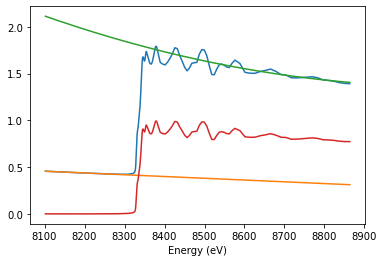

In [26]:
plt.plot(dat_ni.energy, dat_ni.mu, label='mu')
plt.plot(dat_ni.energy, dat_ni.pre_edge, label='pre-edge line')
plt.plot(dat_ni.energy, dat_ni.post_edge, label='post-edge curve')
plt.plot(dat_ni.energy, dat_ni.norm, label='norm')
plt.xlabel("Energy (eV)")

Text(0.5, 0, 'Energy (eV)')

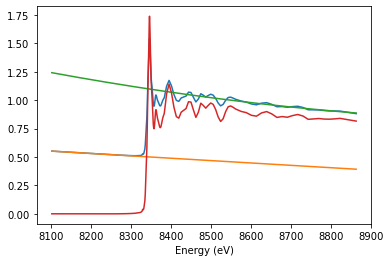

In [27]:
plt.plot(dat_nio.energy, dat_nio.mu, label='mu')
plt.plot(dat_nio.energy, dat_nio.pre_edge, label='pre-edge line')
plt.plot(dat_nio.energy, dat_nio.post_edge, label='post-edge curve')
plt.plot(dat_nio.energy, dat_nio.norm, label='norm')
plt.xlabel("Energy (eV)")


Text(0.5, 0, 'Energy (eV)')

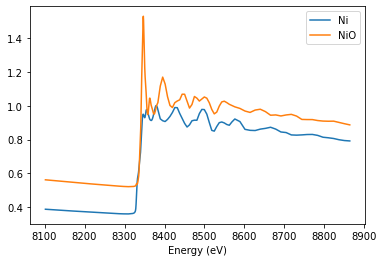

In [34]:
plt.plot(dat_ni.energy, dat_ni.mu, label='Ni')
plt.plot(dat_nio.energy, dat_nio.mu, label='NiO')
plt.legend()
plt.xlabel("Energy (eV)")

Text(0.5, 0, 'Energy (eV)')

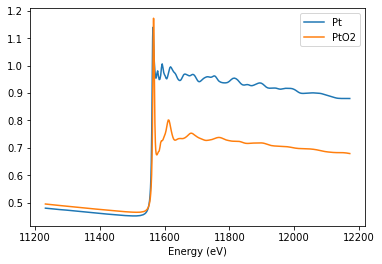

In [36]:
plt.plot(dat_pt.energy, dat_pt.mu, label='Pt')
plt.plot(dat_pto2.energy, dat_pto2.mu, label='PtO2')
plt.legend()
plt.xlabel("Energy (eV)")